In [45]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [46]:
#Loading dataset
crop_df=pd.read_csv('Crop Production data (1).csv')


In [47]:
crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [7]:
#Checking null value count from dataset
crop_df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [11]:
#we have to drop 3730 null rows for better analysis
crop_df.dropna(inplace=True)

In [13]:
#after dropping null values there is no null values in dataset
crop_df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [16]:
#checking the unique type of season
crop_df.Season.unique() #() make array

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [48]:
print("Columns in the dataset:", crop_df.columns)

Columns in the dataset: Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')


In [51]:
# Drop any rows with missing values in essential columns
crop_df =  crop_df.dropna(subset=['Production', 'Area'])

# Encode categorical variables as dummy variables for Decision Tree compatibility
data = pd.get_dummies( crop_df, columns=['State_Name', 'District_Name', 'Season', 'Crop'], drop_first=True)

# Define features (X) and target (y)
X =  crop_df.drop(['Production', 'Crop_Year'], axis=1)  # Exclude Crop_Year if not needed for prediction
y =  crop_df['Production']

In [57]:
# Display the data types of each column to confirm all are numeric
print("Column data types:\n", crop_df.dtypes)



Column data types:
 State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object


In [58]:
# Check for non-numeric columns and reapply get_dummies if any are found
non_numeric_cols = crop_df.select_dtypes(include=['object']).columns
if non_numeric_cols.any():
    print("Non-numeric columns detected:", non_numeric_cols)
    crop_df = pd.get_dummies(crop_df, columns=non_numeric_cols, drop_first=True)


Non-numeric columns detected: Index(['State_Name', 'District_Name', 'Season', 'Crop'], dtype='object')


In [59]:
# Confirm all columns are numeric now
print("Column data types after re-encoding:\n", crop_df.dtypes)

Column data types after re-encoding:
 Crop_Year                         int64
Area                            float64
Production                      float64
State_Name_Andhra Pradesh         uint8
State_Name_Arunachal Pradesh      uint8
                                 ...   
Crop_Wheat                        uint8
Crop_Yam                          uint8
Crop_other fibres                 uint8
Crop_other misc. pulses           uint8
Crop_other oilseeds               uint8
Length: 808, dtype: object


In [61]:
# Define features (X) and target (y)
X = crop_df.drop(['Production', 'Crop_Year'], axis=1, errors='ignore')
y = crop_df['Production']

In [62]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Initialize and train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [66]:
# Predictions and evaluation
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 44534806326230.375
R-squared Score: 0.8893099136902538


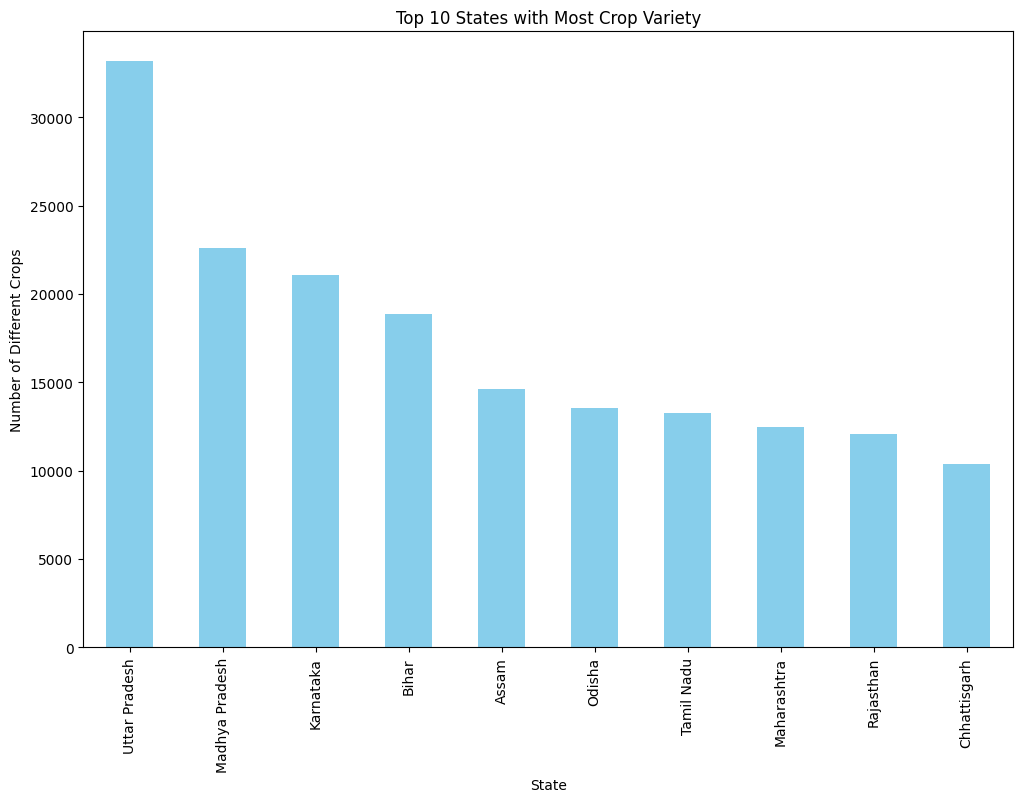

In [18]:
# Count the number of entries per crop per state
state_crop_counts = crop_df.groupby(['State_Name', 'Crop']).size().unstack().fillna(0)

# Plot the top 10 states with the most crop variety
top_states = state_crop_counts.sum(axis=1).sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_states.plot(kind='bar', color='skyblue')
plt.title("Top 10 States with Most Crop Variety")
plt.xlabel("State")
plt.ylabel("Number of Different Crops")
plt.show()


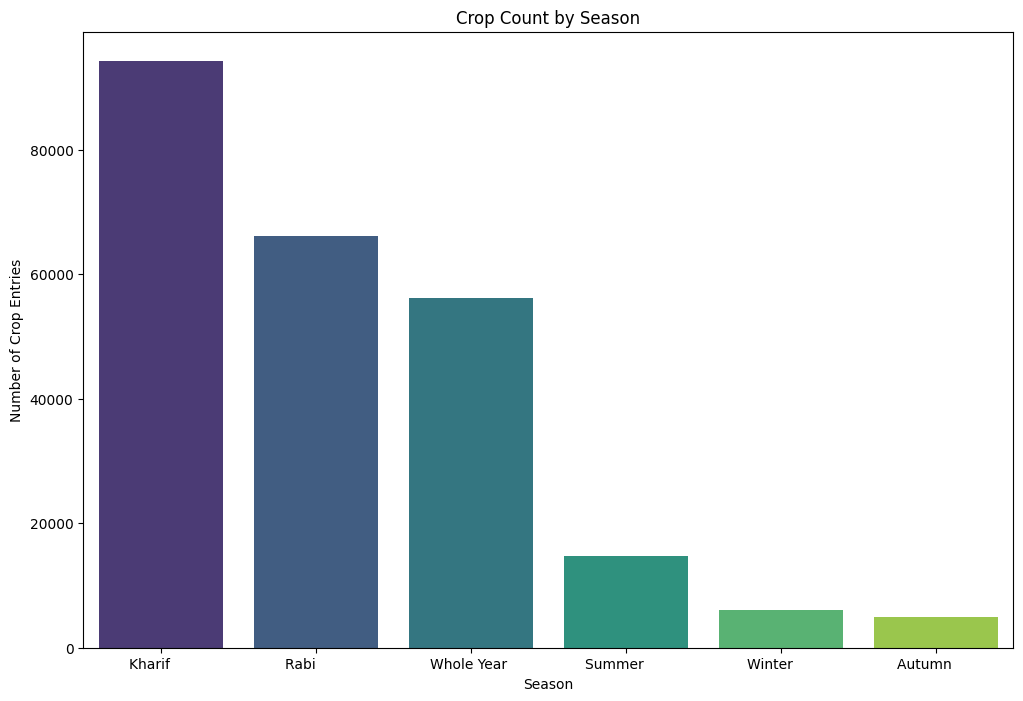

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(data=crop_df, x='Season', order=crop_df['Season'].value_counts().index, palette='viridis')
plt.title("Crop Count by Season")
plt.xlabel("Season")
plt.ylabel("Number of Crop Entries")
plt.show()


In [23]:
# Add a new feature: Yield per Hectare
crop_df['Yield_per_Hectare'] = crop_df['Production'] / crop_df['Area']

# Check for any infinite values or NaNs created in this calculation
crop_df = crop_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Yield_per_Hectare'])


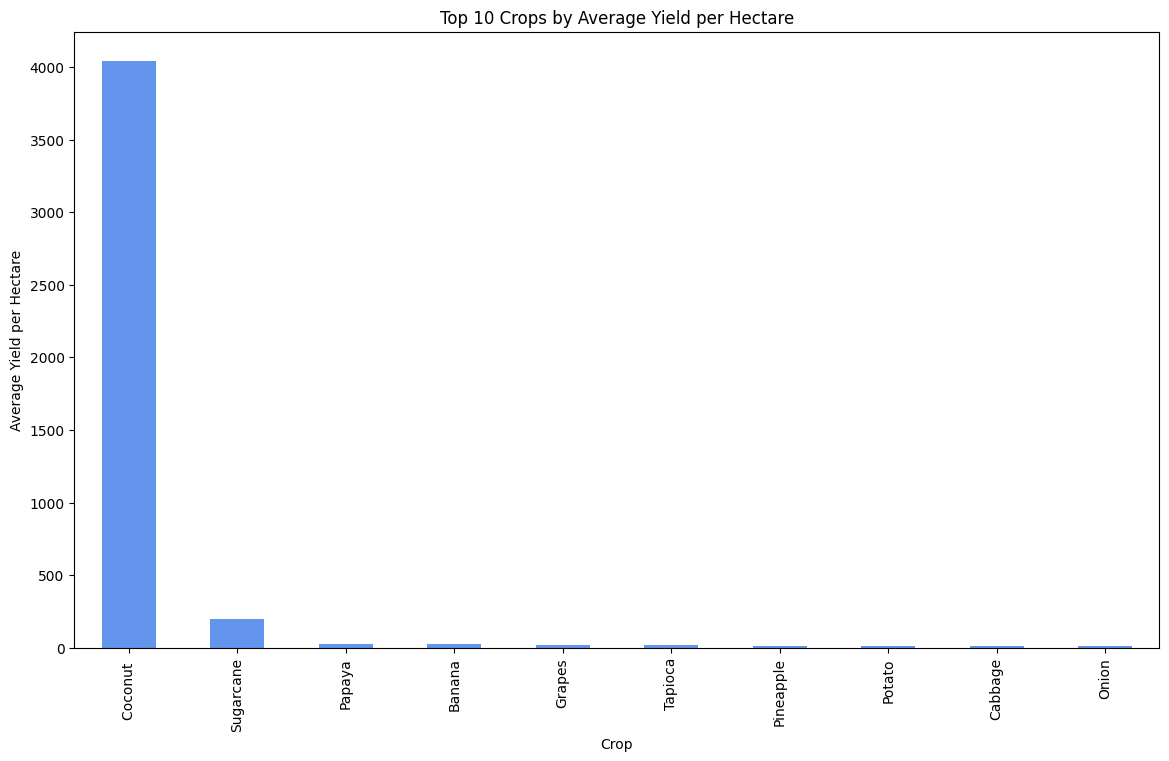

In [24]:
avg_yield_per_crop = crop_df.groupby('Crop')['Yield_per_Hectare'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
avg_yield_per_crop.plot(kind='bar', color='cornflowerblue')
plt.title("Top 10 Crops by Average Yield per Hectare")
plt.xlabel("Crop")
plt.ylabel("Average Yield per Hectare")
plt.show()


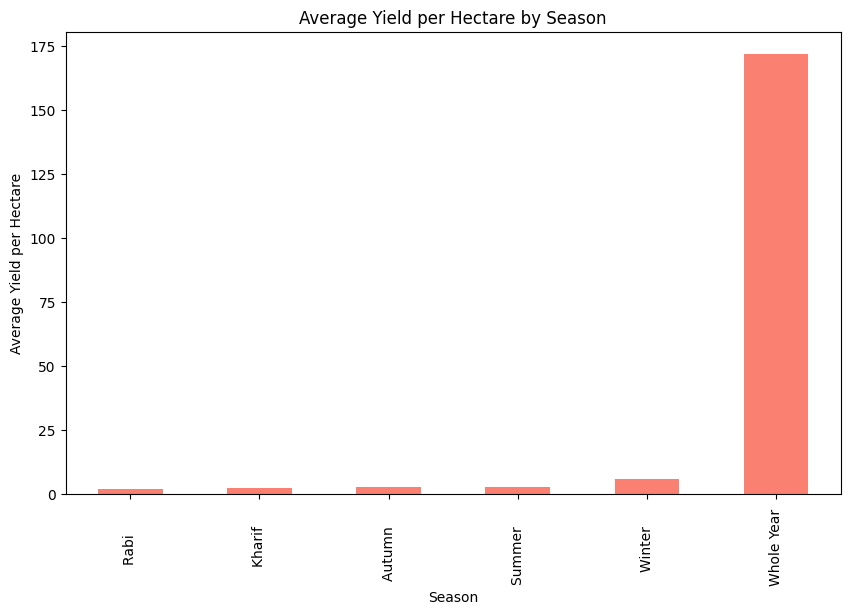

In [25]:
seasonal_yield = crop_df.groupby('Season')['Yield_per_Hectare'].mean().sort_values()

plt.figure(figsize=(10, 6))
seasonal_yield.plot(kind='bar', color='salmon')
plt.title("Average Yield per Hectare by Season")
plt.xlabel("Season")
plt.ylabel("Average Yield per Hectare")
plt.show()


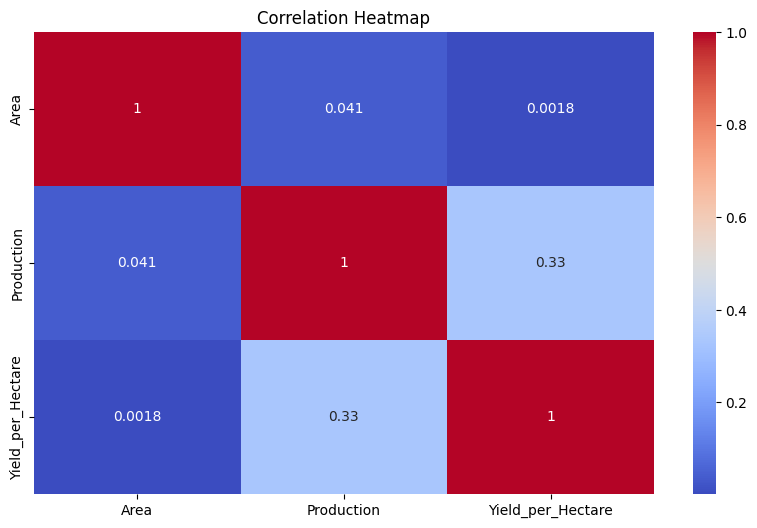

In [26]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crop_df[['Area', 'Production', 'Yield_per_Hectare']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


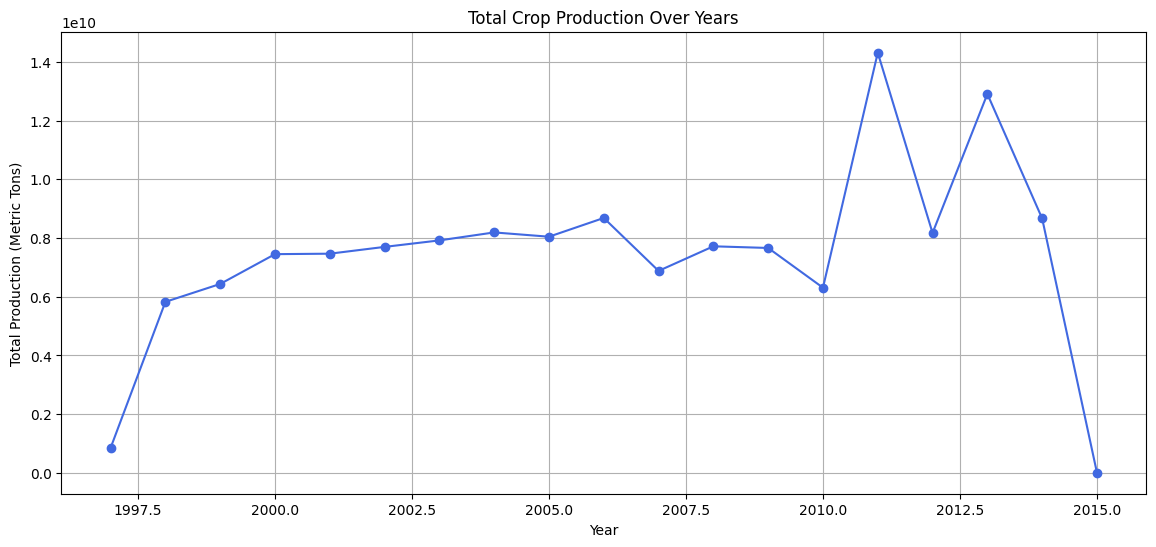

In [29]:
# Average production per year
annual_production = dat.groupby('Crop_Year')['Production'].sum()

plt.figure(figsize=(14, 6))
plt.plot(annual_production.index, annual_production.values, marker='o', color='royalblue')
plt.title("Total Crop Production Over Years")
plt.xlabel("Year")
plt.ylabel("Total Production (Metric Tons)")
plt.grid()
plt.show()



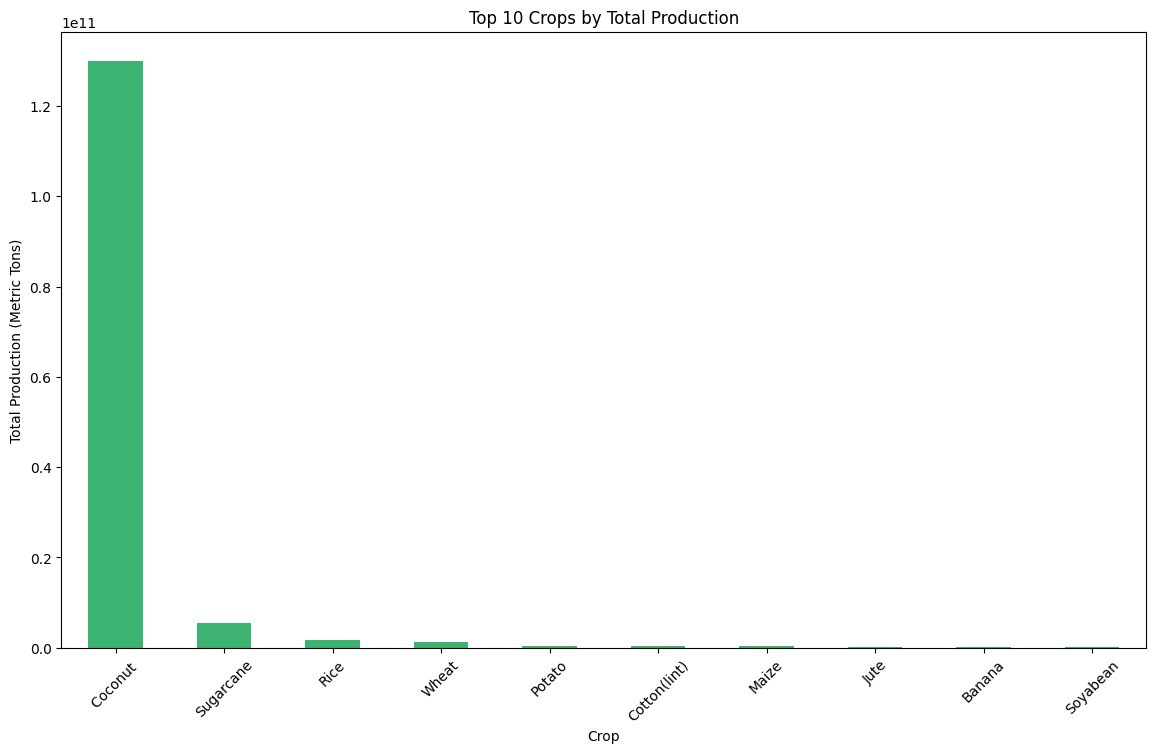

In [33]:
# Total production by crop
top_crops = crop_df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
top_crops.plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 Crops by Total Production")
plt.xlabel("Crop")
plt.ylabel("Total Production (Metric Tons)")
plt.xticks(rotation=45)
plt.show()


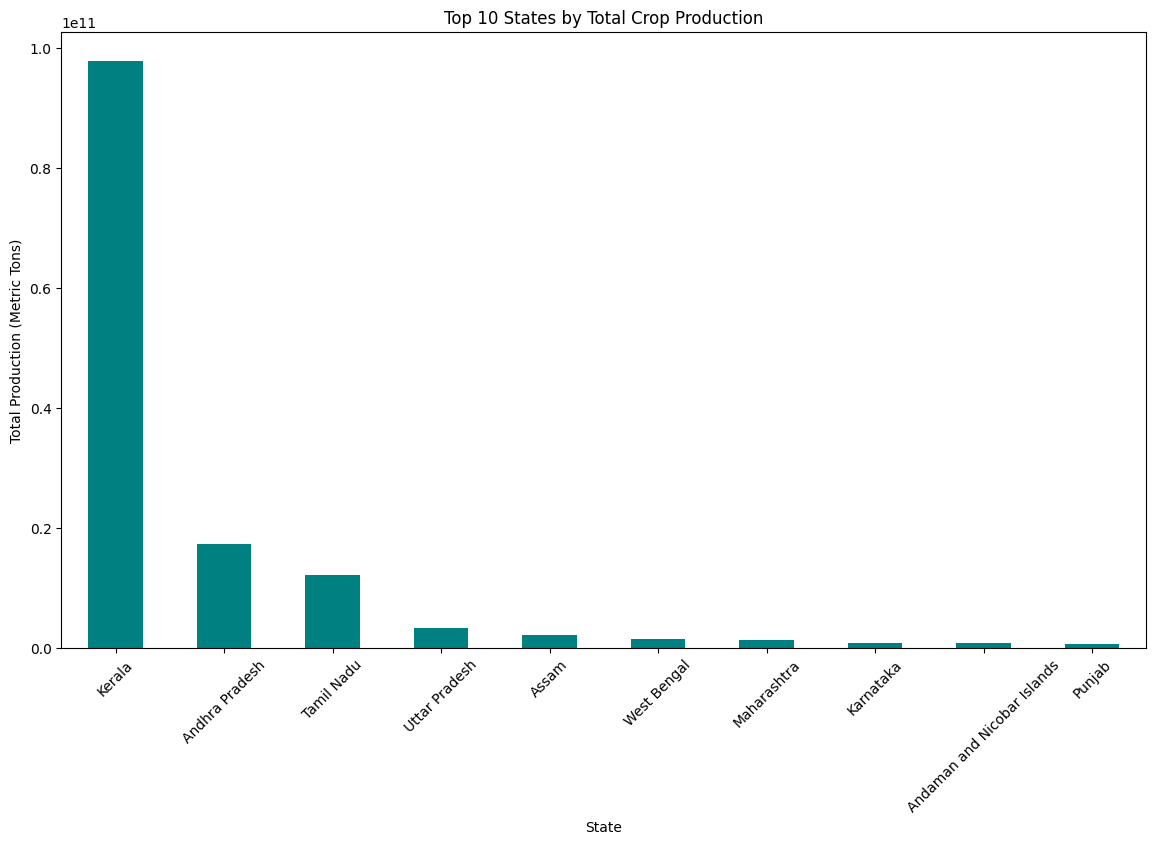

In [34]:
# Sum of production by state
state_production = crop_df.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
state_production.plot(kind='bar', color='teal')
plt.title("Top 10 States by Total Crop Production")
plt.xlabel("State")
plt.ylabel("Total Production (Metric Tons)")
plt.xticks(rotation=45)
plt.show()
